# Ensemble models

### Read Data into Pandas Data Frames

We begin by creating CSVs out of the training and test datasets. We don't have to do this but we like CSVs.

In [1]:
import pandas as pd
col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
adult = pd.read_csv("adult.data", names = col_names)
adult.to_csv("adult_train.csv", index = False)

adult = pd.read_csv("adult.test", names = col_names)
adult.to_csv("adult_test.csv", index = False)

Let's now read the CSVs we created in the above cell into separate DataFrame objects.

In [2]:
file_train = "adult_train.csv" # Change it to your local directory
file_test = "adult_test.csv"

import pandas as pd
df_train = pd.read_csv(file_train, sep = ",", header = 0)
df_test = pd.read_csv(file_test, sep = ",", header = 0)
df_train.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

Let's create a list of our categorical columns. Here keep every column whose data types is `object`, but we may need to narrow the list down even further.

In [2]:
cat_vars = list(df_train.dtypes.index[df_train.dtypes == 'object'])
cat_vars.pop() # removes `income` from cat_vars
cat_vars

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### Get features and labels from training and test data

Let's drop any rows with missing data from the training and test sets. This is a very conservative approach and if we don't have a lot of data to begin with we may want to try a different approach such as imputing the missing values.

In [3]:
df_train = df_train.dropna(axis = 0)
df_test = df_test.dropna(axis = 0)

We now split the data into features and labels.

In [4]:
X_train = df_train.iloc[:, 0:14]
Y_train = df_train.iloc[:, 14]

X_test = df_test.iloc[:, 0:14]
Y_test = df_test.iloc[:, 14]

### How `OneHotEncoder` works

As part of data pre-processing, we need to one-hot-encode the categorical features. For that we use the `OneHotEncoder` class. Let's create a very small train and test data with two rows and two columns just to learn how `OneHotEncoder` works.

In [5]:
import numpy as np

X_small_train = X_train.loc[2:3, ["race", "sex"]]
X_small_train.iloc[1, 1] = np.nan # introduce a nan to see what happens
X_small_train.head()

race    sex
2   White   Male
3   Black    NaN

In [6]:
X_small_test = X_train.loc[4:5, ["race", "sex"]]
X_small_test.head()

race      sex
4   Black   Female
5   White   Female

The `OneHotEncoder` class has two very important arguments called `handle_missing` and `handle_unknown` ethier of which can be set to `"error"`, `"return_nan"`, `"value"` or `"indicator"`.

In [44]:
import category_encoders as ce

handle = "value" # error return_nan value indicator
onehoter =  ce.OneHotEncoder(return_df = True, 
                       # cols = cat_vars, 
                       drop_invariant = False,
                       use_cat_names = True, 
                       handle_missing = handle, 
                       handle_unknown = handle)

#### LAB

Let's examing the following settings and describe what happens when you run `onehoter` on `X_small_train` and `X_small_test`.
- Set `handle = "indicator"` and `drop_invariant = False`.
- Set `handle = "error"`.
- Set `handle = "value"` and `drop_invariant = True`.
- Set `handle = "value"` and `drop_invariant = False`.
- Set `handle = "return_nan"` and `drop_invariant = True`.
- Set `handle = "return_nan"` and `drop_invariant = False`.

Which settings do you think are better in production? Why?

In [45]:
X_small_train.head()

race    sex
2   White   Male
3   Black    NaN

In [46]:
onehoter.fit(X_small_train)
onehoter.transform(X_small_train)

race_ White  race_ Black  sex_ Male  sex_nan
2            1            0          1        0
3            0            1          0        1

In [47]:
X_small_test.head()

race      sex
4   Black   Female
5   White   Female

In [48]:
onehoter.transform(X_small_test)

race_ White  race_ Black  sex_ Male  sex_nan
4            0            1          0        0
5            1            0          0        0

### End of lab

Let's now run `OneHotEncoder` on the data. We create an instance of the class, which we call `onehoter`.

In [49]:
import category_encoders as ce

handle = "value" # error return_nan value indicator
onehoter =  ce.OneHotEncoder(return_df = True, 
                       cols = cat_vars, 
                       drop_invariant = False,
                       use_cat_names = True, 
                       handle_missing = handle, 
                       handle_unknown = handle)

Now we fit `onehoter` it to the training data. In this context, calling `fit` will figure out how many features will need to be derived. After fitting it to the training data, we call the `transform` method both on the training and the test data to actually perform the one-hot-encoding.

In [50]:
onehoter.fit(X_train)
X_encoded_train = onehoter.transform(X_train)
X_encoded_test = onehoter.transform(X_test)

In [51]:
print("X_train shape = {}".format(X_train.shape))
print("X_encoded_train shape = {}".format(X_encoded_train.shape))

print("X_test shape = {}".format(X_test.shape))
print("X_encoded_test shape = {}".format(X_encoded_test.shape))

X_train shape = (32561, 14)
X_encoded_train shape = (32561, 108)
X_test shape = (16281, 14)
X_encoded_test shape = (16281, 108)


It might be a good idea to ensure that the training and test sets have the same number of columns before proceeding to the next step.

In [52]:
assert(X_encoded_train.shape[1] == X_encoded_test.shape[1])

### Train a random forest model

We're now ready to train models on the one-hot-encoded data. Let's start with a random forest model Notice that the `RandomForestClassifier` class below has several hyper-parameters such as `nTrees`, `max_depth` and `min_leaf_size`. For reasons that will become apparent later, we store these hyper-parameters in a dictionary called `hypers` and then pass them to the class. 

In [ ]:
hypers = {"nTrees": 200, "max_depth": 10, "min_leaf_size": 20}

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = hypers["nTrees"], 
                                max_depth = hypers["max_depth"], 
                                random_state = 0, 
                                min_samples_leaf = hypers["min_leaf_size"],
                                verbose = False)

Let's now train the random forest classifier.

In [83]:
clf_rf.fit(X_encoded_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=False,
            warm_start=False)

One by product of tree-based models is that they provide us with a list showing the relative importance of each feature to the model. So even if we're not interested in using a random forest model, we can use it for **feature selection**: train the random forest on the whole data to get the top $n$ most important features and pass only those features to another algorithm to train a model.

In [84]:
len(clf_rf.feature_importances_)

108

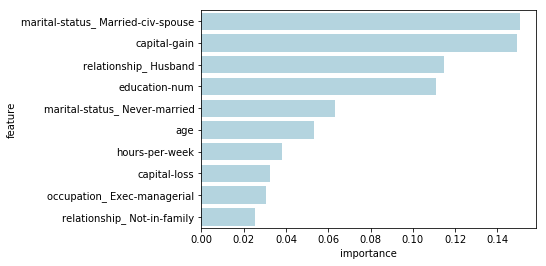

In [85]:
df_var_imp = pd.DataFrame({"feature": X_encoded_train.columns, 
                           "importance": clf_rf.feature_importances_})
df_var_imp.sort_values(by = "importance", ascending = False, inplace = True)

import seaborn as sns
ax = sns.barplot(x = "importance", y = "feature", data = df_var_imp.head(10), color = "lightblue")

### Predict the test data and evaluate

To get predictions from the trained model, we simply call the `predict` method and pass it the data. To check if we're overfitting or not, we can get predictions for both the training and the test data. Once we have the predictions, we can call the `accuracy_score` function to get the accuracy on the training and test data.

In [86]:
Y_train_hat = clf_rf.predict(X_encoded_train)

Y_test_hat = clf_rf.predict(X_encoded_test)

There is a slight discrepancy between the labels as they show up in the training data and the test data: the labels in the test data end with a period. So we need to remove the period when we evaluate the model. We do so using `.str.replace("\\.$", "")` in the cell below, where `"\\.$"` is a regular expression that searches for a period at the end of a string.

In [87]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(Y_test.str.replace("\\.$", ""), Y_test_hat)
acc_train = accuracy_score(Y_train, Y_train_hat)

# hyper_params = ", ".join([x + " = " + str(y) for x, y in zip(hypers.keys(), hypers.values())])

We will be storing some important results in a table we call `results`. If this table doesn't exist (first time we run it) it will initialized by the code below.

In [88]:
try:
    results # checks if this object exists or not
except NameError:
    results = pd.DataFrame(columns = ["algo", "acc_train", "acc_test"]) # initiates it

Every row of the table will store accuracy metrics for one training iteration given one set of hyper-parameters (also listed in the table).

In [89]:
results.loc[len(results), 0:3] = ["rf", acc_train, acc_test]

for hp in hypers.keys():
    results.loc[len(results) - 1, hp] = hypers[hp]

In [90]:
results

algo acc_train  acc_test  nTrees  max_depth  min_leaf_size  learning_rate
0   rf  0.905132   0.86346   100.0       50.0            2.0            NaN
1   gb  0.858358  0.858915    30.0        5.0           30.0           0.05
2   rf  0.853352   0.85265    50.0       10.0           20.0            NaN
3   gb  0.862996  0.864566    50.0        5.0           30.0           0.05
4   rf    0.8563   0.85566   200.0       10.0           20.0            NaN

We can now go back up to where we trained the random forest classifier and change its hyper-parameters, retrain it, re-evaluate it, and finally store the results as a new row in the `results` table. This way we can compare our different runs.

### Train gradient boosted decision tree model

Let's now train a gradient boosted classifier.

In [ ]:
hypers = {"nTrees": 10, "max_depth": 10, "min_leaf_size": 20, "learning_rate": 0.05}

from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(n_estimators = hypers["nTrees"], 
                                    loss = 'deviance', 
                                    learning_rate = hypers["learning_rate"], 
                                    max_depth = hypers["max_depth"], 
                                    min_samples_leaf = hypers["min_leaf_size"])

One again we train the classifier by calling `fit`.

In [91]:
clf_gb.fit(X_encoded_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

We can display the variable importance plot for a gradient boosted classifier as well. The results should not look very different from using random forests.

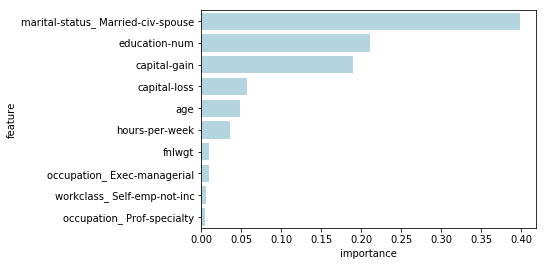

In [92]:
df_var_imp = pd.DataFrame({"feature": X_encoded_train.columns, 
                           "importance": clf_gb.feature_importances_})
df_var_imp.sort_values(by = "importance", ascending = False, inplace = True)

import seaborn as sns
ax = sns.barplot(x = "importance", y = "feature", data = df_var_imp.head(10), color = "lightblue")

### Predict the test data and evaluate

We now score the training and test sets with the trained model from the previous step.

In [93]:
Y_train_hat = clf_gb.predict(X_encoded_train)

Y_test_hat = clf_gb.predict(X_encoded_test)

We obtain the accuracy scores in either case.

In [94]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(Y_test.str.replace("\\.$", ""), Y_test_hat)
acc_train = accuracy_score(Y_train, Y_train_hat)

# hyper_params = ", ".join([x + " = " + str(y) for x, y in zip(hypers.keys(), hypers.values())])

And we store the results in the same `results` table as bofere.

In [95]:
results.loc[len(results), 0:3] = ["gb", acc_train, acc_test]

for hp in hypers.keys():
    results.loc[len(results) - 1, hp] = hypers[hp]

In [96]:
results

algo acc_train  acc_test  nTrees  max_depth  min_leaf_size  learning_rate
0   rf  0.905132   0.86346   100.0       50.0            2.0            NaN
1   gb  0.858358  0.858915    30.0        5.0           30.0           0.05
2   rf  0.853352   0.85265    50.0       10.0           20.0            NaN
3   gb  0.862996  0.864566    50.0        5.0           30.0           0.05
4   rf    0.8563   0.85566   200.0       10.0           20.0            NaN
5   gb   0.82089  0.821694    10.0       10.0           20.0           0.05

### Lab

Return to the two classifiers we trained above and change the hyper-parametrs and train at least 6 different random forest and 6 different gradient boosted classfiers. Make sure to store all the training runs in the `results` table. Once you have all 12 runs, find the best model you have and report its accuracy and state your choice of hyper-parametrs. We will compare this with everyone else in class to see who got the best model. Also, answer the following question:

- What seems to be the effect of increasing `nTrees`, `max_depth`, and `min_leaf_size` on the accuracy of the training and test data? Does this match your intuition about how these hyper-parameters work?

Hyper-parameter tuning can be a very time-consuming and difficult task. In a future Notebook, we will see how we can use a python library to automatically specify different hyper-parameter values ahead of time and train different models. This will save us from having to manually go back to the top and change and rerun things like we did in this Notebook.

### End of lab